# Data Basics Assignment

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)  
**Date:** January 10, 2023

In this assignment you are going to analyze this [Immunotherapy dataset](http://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset). The study that has produced the dataset is described [here](https://www.ncbi.nlm.nih.gov/pubmed/28086200). The dataset contains only the immunotherapy subset of patients. Review the paper for description of the attributes.

- Create a `hwdatabasics.mlx`, `hwdatabasics.ipynb` or `hwdatabasics.rmd` file to perform the following tasks.

In [1]:
from os import chdir
chdir('/home/muaddib/sietch/courses/bmes547/1_data/homework/')

In [31]:
# Imports from standard-library

# Imports from third-party packages
from infoml.utils import downloadurl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx"
datafile = downloadurl(url, 'immunotherapy.xlsx')

# Load the data
df = pd.read_excel(datafile)

- For each attribute, find its correlation with the result of treatment. Exclude result of treatment as an attribute so you do not find its correlation with itself. Note that correlation is not the best measurement for categroical features, especially if there are more than 2 categories. But, for this assignment, we'll ignore this caveat and calculate correlation anyway. You do not need to convert categorical features for this assignment, just use the numbers as they are.

In [3]:
# Calculate correlation with treatment results
corr = df.corr().iloc[:-1, -1]

# Store in a dataframe
results = (pd.DataFrame(corr)
    .rename(columns={'Result_of_Treatment': 'correlation'}))

- For each attribute, find if there is a statistically significant difference in that attribute, between successful and failed treatments. Use *two-sample t-test* for the comparison and find the p-value. Report the names of attributes that you found to be statistically significantly different. You need to decide your own p-value threshold.

In [6]:
# Test for statistically significant difference between groups
# Assume that the data is normally distributed, and variance is equal
pvals = stats.ttest_ind(
    df[df['Result_of_Treatment'] == 1].iloc[:, :-1],
    df[df['Result_of_Treatment'] == 0].iloc[:, :-1],
    equal_var=True
).pvalue

# Store in a dataframe
results['pvalue'] = pvals

# Report the statistically significant results
p_thr = 0.1
sig = results[results['pvalue'] < p_thr].index.to_list()
print("The following features are statistically significant:", ', '.join(sig))

The following features are statistically significant: age, Time


- Report the significant correlation coefficients and p-values of **all of** the attributes in a tabular format [First column containing variable names, second column containing correlation values, and third column containing pvalues). The reported table must be sorted in increasing order by p-values.

In [7]:
# Report the correlation and p-value for each feature
(results
    .reset_index()
    .rename(columns={'index': 'feature'})
    .sort_values('pvalue'))

,feature,correlation,pvalue
2,Time,-0.361172,0.000470
1,age,-0.188314,0.075490
4,Type,0.083396,0.434530
3,Number_of_Warts,-0.047160,0.658927
5,Area,0.043349,0.684972
6,induration_diameter,-0.031273,0.769820
0,sex,0.018831,0.860167


- For the attributes with the most significant p-value, create a box plot showing a summary of the values of that attribute, for successfule and failed treatments.

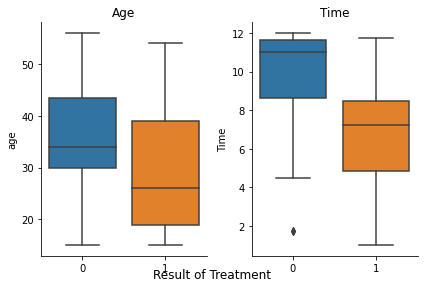

In [49]:
# Create a boxplot for the significant features
fig, ax = plt.subplots(1, len(sig), figsize=(len(sig)*3, 4))
for i, s in enumerate(sig):
    sns.boxplot(x='Result_of_Treatment', y=s, data=df, ax=ax[i])
    ax[i].set_title(s.capitalize())
    ax[i].set_xlabel('')

# Add x axis title
fig.text(0.5, 0.01, 'Result of Treatment', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
sns.despine()
